In [274]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
import warnings
import seaborn as sns

In [284]:
train['scannedLineItems'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']
train['pricePerScannedLineItem'] = train['grandTotal'] / train['scannedLineItems']
train['scansWithoutRegistrationPerScannedLineItem'] = train['scansWithoutRegistration'] / train['scannedLineItems']
train['quantityModificationsPerScannedLineItem'] = train['quantityModifications'] / train['scannedLineItems']
train['lineItemVoidsPerSecond'] = train['lineItemVoids'] / train['totalScanTimeInSeconds']
train['scansWithoutRegistrationPerSecond'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']
train['quantityModificationsPerSecond'] = train['quantityModifications'] / train['totalScanTimeInSeconds']
train['secondsPerEuro'] = train['totalScanTimeInSeconds'] / train['grandTotal']
train['lineItemVoidsPerEuro'] = train['lineItemVoids'] / train['grandTotal']
train['scansWithoutRegistrationPerEuro'] = train['scansWithoutRegistration'] / train['grandTotal']
train['quantityModificationsPerEuro'] = train['quantityModifications'] / train['grandTotal']

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

# Cross validation
skf = StratifiedKFold(n_splits=10)
loo = LeaveOneOut()

# Split *train* dataset to feature and target sets 
X = train.drop('fraud',axis=1)
Y = train['fraud']

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

def my_custom_loss_func(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    tn, fp, fn, tp = cm.ravel()
    score = ((-25)*fp + (-5)*fn + 5*tp) / len(y_true)
    return (score)

my_custom_score = make_scorer(my_custom_loss_func, greater_is_better=True)

print(X.shape, Y.shape)

(1879, 20) (1879,)


In [286]:
# For reproducability of the results
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])

In [287]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer 

feature_scaler = MinMaxScaler()
X = pd.DataFrame(feature_scaler.fit_transform(X.values), columns=X.columns, index=X.index)
data_preparation = "MinMaxScaler"

#feature_scaler = StandardScaler()
#X = pd.DataFrame(feature_scaler.fit_transform(X.values), columns=X.columns, index=X.index)
#data_preparation = "StandardScaler"

#transformer = FunctionTransformer(np.log1p, validate=True)
#X_scaled = pd.DataFrame(transformer.transform(X), columns=X.columns, index=X.index)
#data_preparation = "LogScaler"

(1879, 7)
Explained variation per principal component: [0.16440363 0.15535511 0.1427736  0.1339451  0.12917544 0.11052898
 0.10986529]
Cumulative explained variation for 7 principal components: 0.9460471483845855
[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 1879 samples in 0.000s...
[t-SNE] Computed neighbors for 1879 samples in 0.094s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1879
[t-SNE] Computed conditional probabilities for sample 1879 / 1879
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.000000
[t-SNE] KL divergence after 300 iterations: 0.000000
t-SNE done! Time elapsed: 5.251225709915161 seconds
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1879 samples in 0.000s...
[t-SNE] Computed neighbors for 1879 samples in 0.203s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1879
[t-SNE] Computed conditional probabilities for sample 1879 / 1879
[t-SNE] Mean sigma: 0.209316
[t

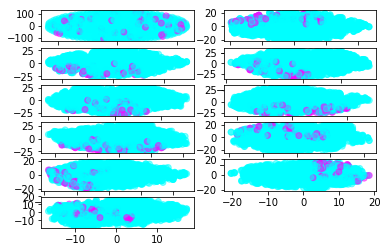

In [302]:
data_subset = X

pca = PCA(n_components=7)
pca_result = pca.fit_transform(data_subset)

print(pca_result.shape)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation for 7 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))
count=1
for perp in range(0,110,10):
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=300)
    tsne_results = tsne.fit_transform(X)

    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    df_subset['tsne-2d-one'] = tsne_results[:,0]
    df_subset['tsne-2d-two'] = tsne_results[:,1]

    ax2 = plt.subplot(6, 2, count)
    plt.scatter(df_subset["tsne-2d-one"], df_subset["tsne-2d-two"],  c=Y, cmap="cool", alpha=0.5)
    count+=1

plt.show()

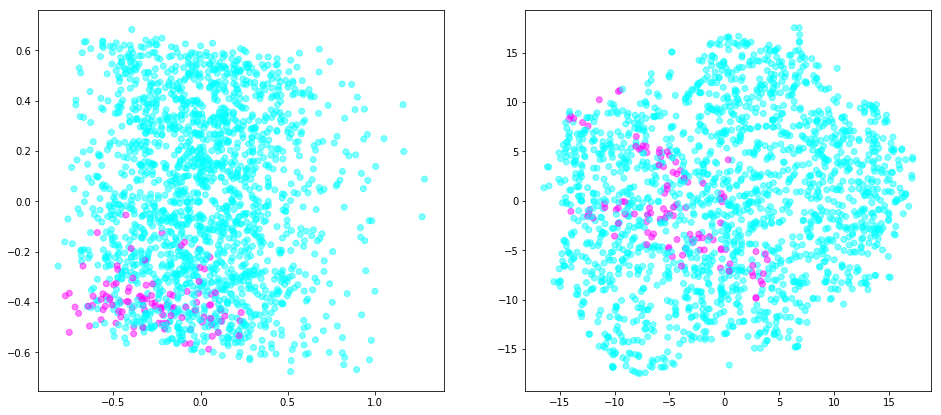

In [303]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
plt.scatter(df_subset["pca-one"], df_subset["pca-two"],  c=Y, cmap="cool", alpha=0.5)

ax2 = plt.subplot(1, 2, 2)
plt.scatter(df_subset["tsne-2d-one"], df_subset["tsne-2d-two"],  c=Y, cmap="cool", alpha=0.5)

plt.show()

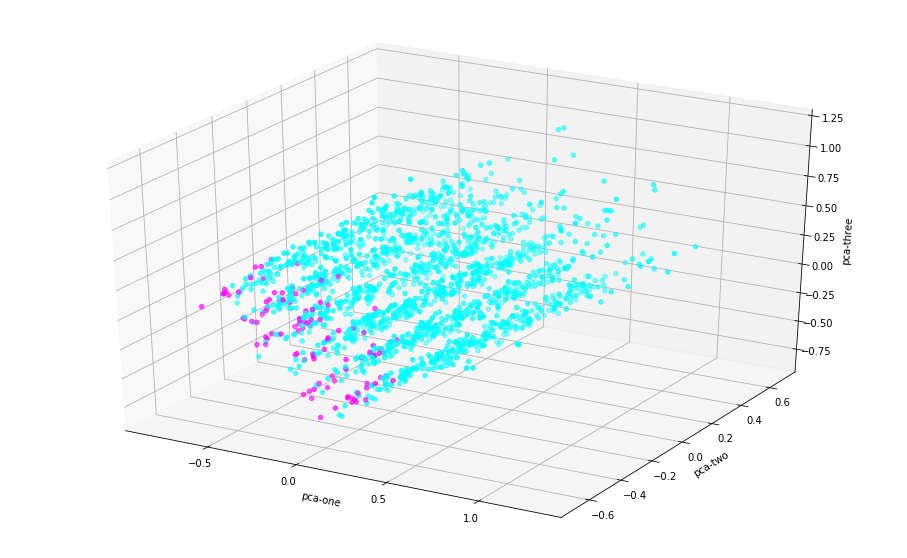

In [292]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset["pca-one"], 
    ys=df_subset["pca-two"], 
    zs=df_subset["pca-three"], 
    c=Y, 
    cmap='cool'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

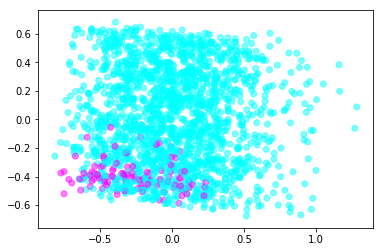

In [293]:
x = df_subset["pca-one"]
y = df_subset["pca-two"]

plt.scatter(x, y,  c=Y, cmap="cool", alpha=0.5)
plt.show()

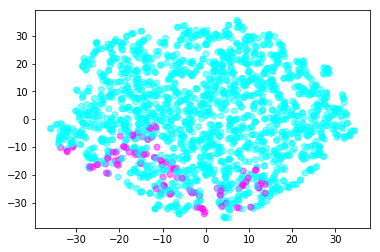

In [294]:
x = df_subset["tsne-2d-one"]
y = df_subset["tsne-2d-two"]

plt.scatter(x, y,  c=Y, cmap="cool", alpha=0.5)
plt.show()